In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


Load PRN15 CSV data

In [2]:
import pandas as pd
# Path to the CSV file
file_path = 'data/candidates_prn15.csv'

# Loading the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Replacing 'PARTI ISLAM SE MALAYSIA' with 'PERIKATAN NASIONAL' in the 'party' column
data['party'] = data['party'].replace('PARTI ISLAM SE MALAYSIA', 'PERIKATAN NASIONAL')

# Showing the first few rows of the DataFrame
data.head()


,state,parlimen,dun,ballot_order_x,name,name_ballot,party,acronym,age,sex,ethnicity,ballot_order_y,votes,votes_perc,result
0,Kedah,P.004 Langkawi,N.01 Ayer Hangat,1,SHAMSILAH BINTI SIRU,SHAMSILAH BINTI SIRU,PERIKATAN NASIONAL,PN,49,female,malay,1,10701,47.305601,won
1,Kedah,P.004 Langkawi,N.01 Ayer Hangat,2,SAFWAN HANIF BIN SHAFIE,SAFWAN HANIF,BEBAS,BEBAS,34,male,malay,2,6877,30.400955,lost
2,Kedah,P.004 Langkawi,N.01 Ayer Hangat,3,HISHAM SUHAILY BINTI OTHMAN,HISHAM SUHAILY BINTI OTHMAN,BARISAN NASIONAL OF MALAYSIA,BN,46,female,malay,3,4909,21.701074,lost
3,Kedah,P.004 Langkawi,N.01 Ayer Hangat,4,ZULFADLI BIN MOHD YUSOFF,ZULFADLI BIN MOHD YUSOFF,BEBAS,BEBAS,37,male,malay,4,134,0.592370,lost_deposit
4,Kedah,P.004 Langkawi,N.02 Kuah,1,AMAR PARED BIN MAHAMUD,AMAR PARED BIN MAHAMUD,PERIKATAN NASIONAL,PN,32,male,malay,1,13364,64.339704,won


Votes by state and party.

In [3]:
# Grouping the votes by 'state' and 'party', and summing the 'votes' column
grouped_votes = data.groupby(['state', 'party'])['votes'].sum().reset_index()

# Calculate the total votes for each state
total_votes_per_state = data.groupby('state')['votes'].sum().reset_index()
total_votes_per_state.rename(columns={'votes': 'total_votes'}, inplace=True)

# Merge the total votes with the grouped votes
grouped_votes = grouped_votes.merge(total_votes_per_state, on='state', how='left')

# Calculate the percentage of votes for each party in each state
grouped_votes['votes_perc'] = ((grouped_votes['votes'] / grouped_votes['total_votes']) * 100).round(2)

# Displaying the result
grouped_votes

,state,party,votes,total_votes,votes_perc
0,Kedah,BARISAN NASIONAL OF MALAYSIA,116340,1162569,10.01
1,Kedah,BEBAS,11057,1162569,0.95
2,Kedah,PAKATAN HARAPAN,233654,1162569,20.10
3,Kedah,PARTI RAKYAT MALAYSIA,138,1162569,0.01
4,Kedah,PERIKATAN NASIONAL,801380,1162569,68.93
5,Kelantan,BARISAN NASIONAL OF MALAYSIA,178437,851841,20.95
6,Kelantan,BEBAS,1894,851841,0.22
7,Kelantan,PAKATAN HARAPAN,81688,851841,9.59
8,Kelantan,PARTI RAKYAT MALAYSIA,126,851841,0.01
9,Kelantan,PERIKATAN NASIONAL,589696,851841,69.23


In [4]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/f6/22/9c31044ff7339c63727a135872e5cb59564f11625372a81c3eebf148f4af/matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/88/e3/696e96ee197b1f60242d12b215332af9fc1961c81990c8b5630b89b34ce6/contourpy-1.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/32/9a/6fe79bfc6b23f2d5e24a7d9d3402df34128b5df939777d57b94ac8251fa5/fonttools-4.42.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.2 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp311-cp311-macosx_11_0_arm64.whl (63 kB)
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/packages/b7/ad/719

Vote breakdown (all states)

1. Group at national level and classify minor parties (<1% national vote) as Other.

In [5]:
# Importing required library for visualization
import matplotlib.pyplot as plt

# Grouping the votes by 'party' at the national level and summing the 'votes' column
national_votes = data.groupby('party')['votes'].sum().reset_index()

# Calculating the total votes
total_national_votes = national_votes['votes'].sum()

# Calculating the percentage of votes for each party
national_votes['votes_perc'] = ((national_votes['votes'] / total_national_votes) * 100).round(2)

# Threshold for grouping smaller parties
threshold_percentage = 1

# Adding a new row for 'OTHER' that includes parties with less than the threshold percentage
national_votes['party'] = national_votes.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)

# Grouping by 'party' again to combine 'OTHER' and calculating the percentage
national_votes_grouped = national_votes.groupby('party')['votes_perc'].sum().reset_index()

national_votes_grouped


,party,votes_perc
0,BARISAN NASIONAL OF MALAYSIA,13.39
1,OTHER,1.08
2,PAKATAN HARAPAN,36.14
3,PERIKATAN NASIONAL,49.39


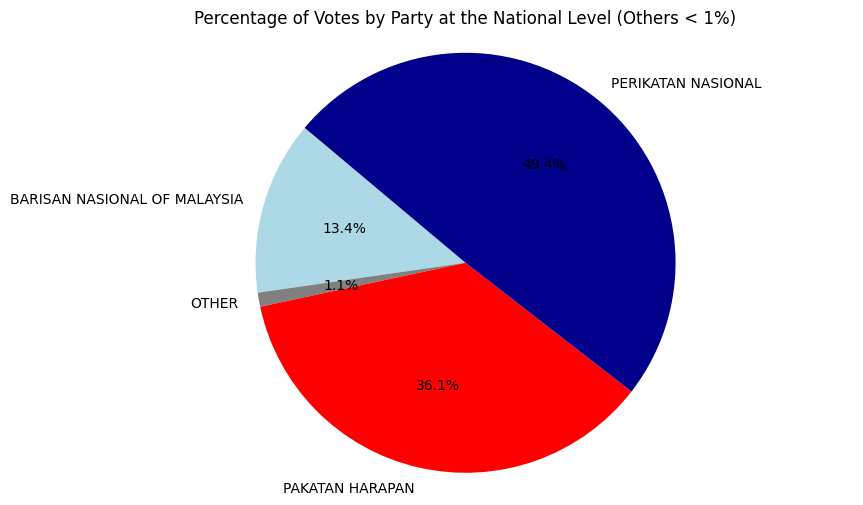

In [6]:
# Plotting the updated pie chart

# Set colors
# Defining the colors for specific parties
party_colors = {
    'PERIKATAN NASIONAL': 'darkblue',
    'BARISAN NASIONAL OF MALAYSIA': 'lightblue',
    'PAKATAN HARAPAN': 'red'
}

# Creating a color list based on the parties in the grouped data
colors = [party_colors[party] if party in party_colors else 'grey' for party in national_votes_grouped['party']]

plt.figure(figsize=(10, 6))
plt.pie(national_votes_grouped['votes_perc'], labels=national_votes_grouped['party'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Votes by Party at the National Level (Others < 1%)')
plt.show()

Plot by state

/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)


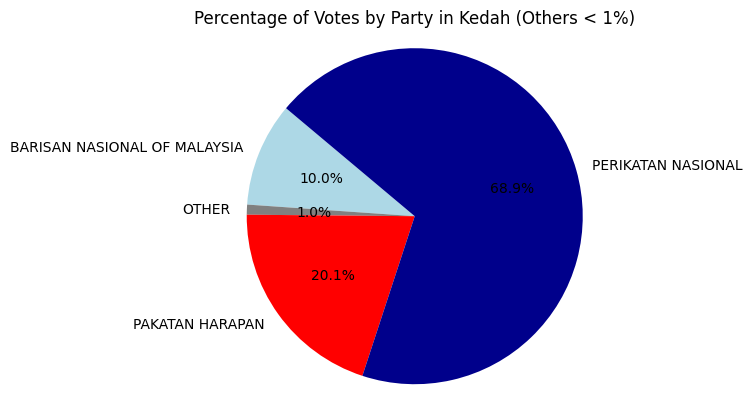

/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)


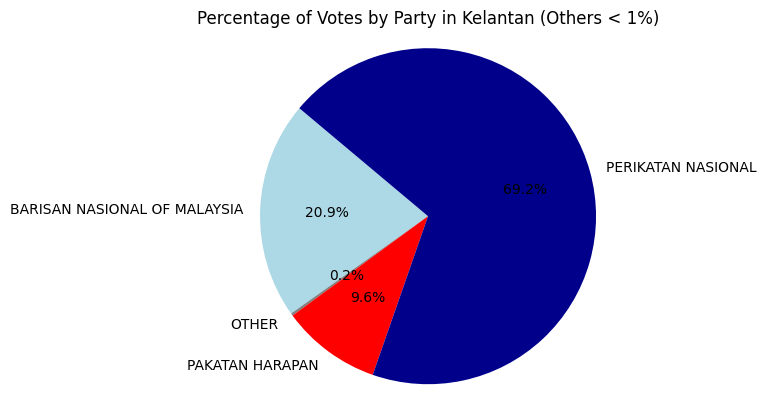

/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)


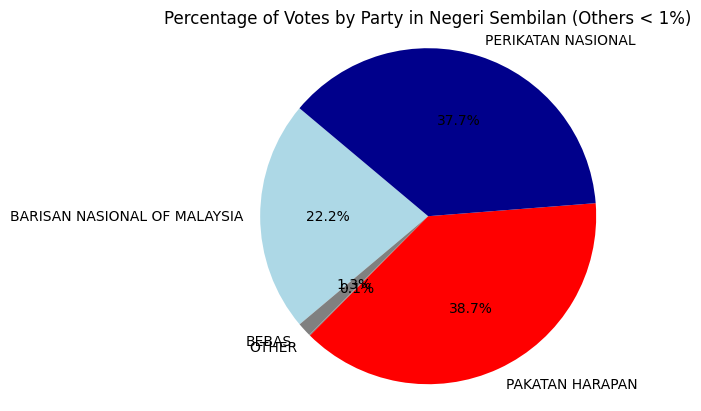

/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)


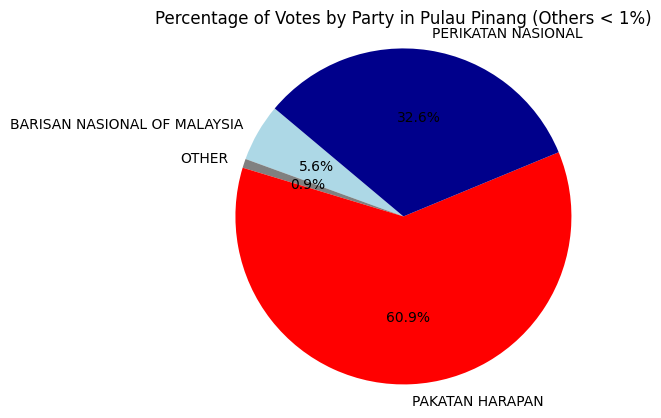

/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)


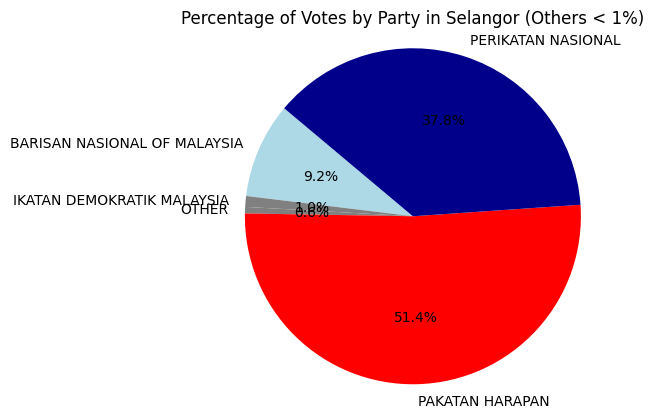

/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
/var/folders/v6/rjrywz716tx6dg0wwngb046h0000gn/T/ipykernel_1310/4157490770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)


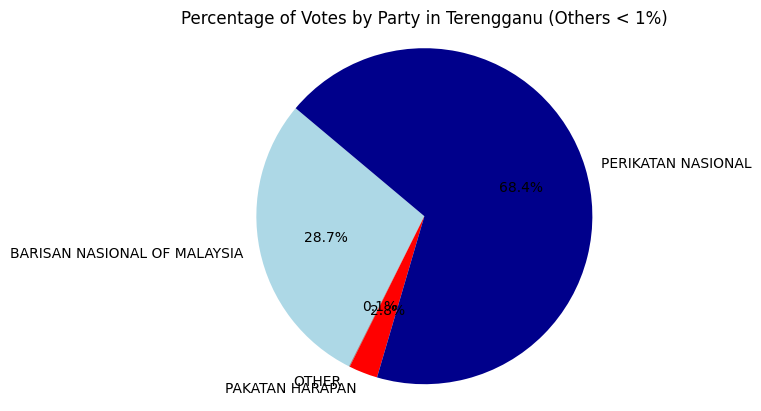

In [7]:
# Function to plot pie chart for a given state
def plot_pie_chart(state_data, state_name):
    # Creating a color list based on the parties in the grouped data
    colors = [party_colors[party] if party in party_colors else 'grey' for party in state_data['party']]
    
    # Plotting the pie chart with the specified colors
    plt.pie(state_data['votes_perc'], labels=state_data['party'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Percentage of Votes by Party in {state_name} (Others < 1%)')
    plt.show()

# Grouping the votes by 'state' and 'party', and summing the 'votes' column
state_votes = data.groupby(['state', 'party'])['votes'].sum().reset_index()

# Iterating through unique states
for state in state_votes['state'].unique():
    # Filtering data for the current state
    current_state_data = state_votes[state_votes['state'] == state]
    
    # Calculating the total votes for the current state
    total_state_votes = current_state_data['votes'].sum()
    
    # Calculating the percentage of votes for each party in the current state
    current_state_data['votes_perc'] = (current_state_data['votes'] / total_state_votes) * 100
    
    # Adding a new row for 'OTHER' that includes parties with less than the threshold percentage
    current_state_data['party'] = current_state_data.apply(lambda row: 'OTHER' if row['votes_perc'] < threshold_percentage else row['party'], axis=1)

    # Grouping by 'party' again to combine 'OTHER' and calculating the percentage
    current_state_data_grouped = current_state_data.groupby('party')['votes_perc'].sum().reset_index()
    
    # Plotting the pie chart for the current state
    plot_pie_chart(current_state_data_grouped, state)
